# Task 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def harmonic_euler(time_steps, tau, x0, v0=0, k=1, m=1):
    x = np.zeros(time_steps)
    x[0] = x0
    v = np.zeros(time_steps)
    v[0] = v0
    a = np.zeros(time_steps)

    E = np.zeros(time_steps)

    for i in range(0, time_steps - 1):
        a[i] = -k / m * x[i]
        v[i + 1] = v[i] + tau * a[i]
        x[i + 1] = x[i] + tau * v[i]
        E[i] = 0.5 * m * v[i] ** 2 + 0.5 * k * x[i] ** 2
    E[-1] = E[-2] * (1 + k / m * tau ** 2)
    return x, E

In [3]:
def harmonic_verlet(time_steps, tau, x0, v0=0, k=1, m=1):
    x = np.zeros(time_steps)
    a0 = -k / m * x0
    x[0] = x0 - tau * v0 + (tau ** 2) * a0 / 2
    x[1] = x0
    v = np.zeros(time_steps)
    # v[1] = v0

    E = np.zeros(time_steps)
    # E[1] = 0.5 * (m * v[1] ** 2 + k * x[1] ** 2)
    a = np.zeros(time_steps)
    for i in range(1, time_steps - 1):
        a[i] = -k / m * x[i]
        x[i + 1] = 2 * x[i] - x[i - 1] + tau ** 2 * a[i]
        v[i] = (x[i + 1] - x[i - 1]) / (2 * tau)
        E[i] = 0.5 * (m * v[i] ** 2 + k * x[i] ** 2)

    return x[1:-1], E[1:-1]

In [4]:
def euler_cromer(time_steps, tau, x0, v0=0, k=1, m=1):
    x = np.zeros(time_steps)
    x[0] = x0
    v = np.zeros(time_steps)
    v[0] = v0
    a = np.zeros(time_steps)

    E = np.zeros(time_steps)

    for i in range(0, time_steps - 1):
        a[i] = -k / m * x[i]
        v[i + 1] = v[i] + tau * a[i]
        x[i + 1] = x[i] + tau * v[i + 1]
        E[i] = 0.5 * (m * v[i] ** 2 + k * x[i] ** 2)
    E[-1] = 0.5 * (m * v[-1] ** 2 + k * x[-1] ** 2)
    return x, E

In [5]:
def plotting(x, E, color, labelName):
    plt.plot(x, color=color, label=labelName)
    plt.plot(E, color=color)
    plt.legend()

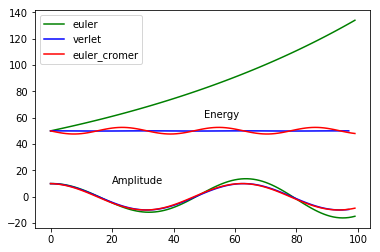

In [7]:
x1, E1 = harmonic_euler(100, 0.1, 10)
x2, E2 = harmonic_verlet(100, 0.1, 10)
x3, E3 = euler_cromer(100, 0.1, 10)

plotting(x1, E1, "green", "euler")
plotting(x2, E2, "blue", "verlet")
plotting(x3, E3, "red", "euler_cromer")

plt.text(50, 60, "Energy")
plt.text(20, 10, "Amplitude")
plt.show()
plt.close()

## Results
As we can see, the Euler method has a diverging total energy, and the simulation differs substantially from the other methods even after only a hundred iterations.
The other two methods work better, and the Verlet method provides a stable, almost constant total energy, which is a result of the symplectic nature of the method.

# Task 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema

In [4]:
def get_T(x, tau):
    x_maxs = argrelextrema(x, np.greater)[0]
    Ts = [x[0]]
    for i in range(len(x_maxs) - 1):
        Ts.append(tau * (x_maxs[i + 1] - x_maxs[i]))

    return np.mean(Ts)

In [5]:
def pendulum(time_steps, tau, x0, v0=0, l=1, g=9.81):
    x = np.zeros(time_steps)
    x[0] = x0

    v = np.zeros(time_steps)
    v[0] = v0

    a = np.zeros(time_steps)
    a0 = -g * np.sin(x0) / l
    a[0] = a0
    for i in range(0, time_steps - 1):
        x[i + 1] = x[i] + tau * v[i] + tau ** 2 * a[i] / 2
        a[i + 1] = -g * np.sin(x[i + 1]) / l
        v[i + 1] = v[i] + tau / 2 * (a[i] + a[i + 1])

    T = get_T(x, tau)

    return x, T

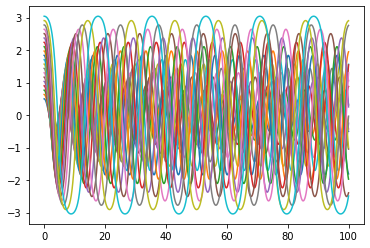

In [7]:
time_steps = 10000
tau = 0.01
l = 10

x_maxs = np.linspace(0.5, np.pi - 0.1, 20)
Ts = []
for x_max in x_maxs:
    x, T = pendulum(time_steps, tau, x_max, l=l)
    plt.plot(np.linspace(0, time_steps * tau, time_steps), x)
    Ts.append(T)

plt.show("ideal_pendulum.png")
plt.close()

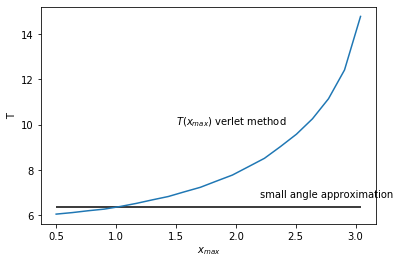

In [8]:
T_0 = 2 * np.pi * np.sqrt(l / 9.81)

plt.plot(x_maxs, Ts)
plt.hlines(T_0, 0.5, np.pi - 0.1)
plt.xlabel(r"$x_{max}$")
plt.ylabel("T")
plt.text(1.5, 10, r"$T(x_{max})$ verlet method")
plt.text(2.2, 6.8, "small angle approximation")
plt.show("T_over_x_pendulum.png")
plt.close()

# Task 3